### Tanzinian Water Pump Classification ###

#### Data Cleaning + EDA ####

### Import Libraries:

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle 
import numpy as np

pd.set_option('precision', 4)
pd.options.display.max_seq_items = None


### Read in training labels and values: 

In [39]:
Y = pd.read_csv('TRAINING_LABELS.csv')
df = pd.read_csv('TRAINING_VALUES.csv', index_col = 0)

In [40]:
# Merge Y to the data frame after we looked at values below

df = df.merge(Y, on = 'id')

First, we look at the training values to assess the data we have and to get a feel for it. 

In [41]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.9381,-9.8563,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.6988,-2.1475,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.4607,-3.8213,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.4862,-11.1553,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.1308,-1.8254,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [42]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.0000,59400.0000,59400.0000,59400.0000,5.9400e+04,59400.0000,59400.0000,59400.0000,59400.0000,59400.0000
mean,37115.1318,317.6504,668.2972,34.0774,-5.7060e+00,0.4741,15.2970,5.6297,179.9100,1300.6525
std,21453.1284,2997.5746,693.1164,6.5674,2.9460e+00,12.2362,17.5874,9.6336,471.4822,951.6205
min,0.0000,0.0000,-90.0000,0.0000,-1.1649e+01,0.0000,1.0000,0.0000,0.0000,0.0000
25%,18519.7500,0.0000,0.0000,33.0903,-8.5406e+00,0.0000,5.0000,2.0000,0.0000,0.0000
50%,37061.5000,0.0000,369.0000,34.9087,-5.0216e+00,0.0000,12.0000,3.0000,25.0000,1986.0000
75%,55656.5000,20.0000,1319.2500,37.1784,-3.3262e+00,0.0000,17.0000,5.0000,215.0000,2004.0000
max,74247.0000,350000.0000,2770.0000,40.3452,-2.0000e-08,1776.0000,99.0000,80.0000,30500.0000,2013.0000


In [43]:
df.shape

(59400, 41)

### Assessing our Target ###
Looking at the values below, we will want to handle this class imbalance, SMOTE, can also try over sampling. 

In [44]:
Y.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

### Dealing with NaN and Null Values; Checking for Duplicates

We have a lot of null values: funder, installer, subvillage, public_meeting, scheme_management,
    scheme_name, and permit. 


In [45]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

Let's deal with the null values first. 

### Funder

In [47]:
#df.funder.value_counts()

In [48]:
#df.installer.value_counts()

In [49]:
df['funder'] = df.funder.fillna('Unknown')
df['installer'] = df.installer.fillna('Unknown')

### Subvillage

In [50]:
#df.subvillage.value_counts()

In [64]:
#df.subvillage.isnull().sum()

In [52]:
freq_subvil = df.groupby(['region']).subvillage.apply(lambda x: x.value_counts().index[0])

In [53]:
df['subvillage'] = np.where(df.subvillage.isnull(), 
                            freq_subvil[df.region], 
                            df.subvillage)

### Public Meeting

In [54]:
#df.public_meeting.value_counts()

In [55]:
df['public_meeting'] = df.public_meeting.fillna(True)

### Scheme Management and Scheme Name 

In [56]:
#df.scheme_management.value_counts()

In [57]:
#df.scheme_name.value_counts()

In [58]:
df['scheme_management'] = df.scheme_management.fillna('Unknown')
df['scheme_name'] = df.scheme_name.fillna('None')

### Permit

If highly class imbalanced, impute the majority, if not assign random bool. 

In [59]:
#df.permit.value_counts()

In [60]:
rand_choice = np.random.choice([True, False], df.permit.isnull().sum())

In [61]:
df['permit']= df.permit.mask(df.permit.isnull(), np.random.choice([True, False], size=len(df)))

In [62]:
df['permit'] = df.permit.astype('bool')

### Double Check for Nulls and Duplicates

In [63]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [65]:
df[df.duplicated('id')]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


 Null values have been removed. No duplicates were found. 
 While we don't have null values now, many of our values are not correct. 

### Data Abnormalities and Outliers


Several of our features seem to be a little off on the numbers. For construction year, these values have a lot of zero values This may take additional research so that imputed values have significance. 

In [66]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [82]:
#df['construction_year'].value_counts()

In [83]:
#df['date_recorded'].value_counts()

In [84]:
#list(df[df['construction_year'] == 0].date_recorded)

Of the construction year, we are missing nearly 35% of the data. 
This is a lot of information to drop or to inpute with an average value. 
We decided to keep this data as 0 and keep it in mind for consideration during feature engineering and selection.


In [75]:
len(df[df.construction_year == 0])/len(df)

0.34863636363636363

### Latitude and Longitude 


In [73]:
tmp = df.copy()
tmp = df[df.longitude > 5]
avg_lat_long = tmp.groupby('region')['latitude', 'longitude'].mean()

/Users/dolcikey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df['latitude'] = np.where(df.longitude < 5, 
         avg_lat_long['latitude'][df.region], df.latitude)
df['longitude'] = np.where(df.longitude < 5, 
         avg_lat_long['longitude'][df.region], df.longitude)

### GPS Height

Seems that there's another grossly missing number in gps height. 

In [76]:
len(df[df.gps_height == 0]) /len(df)


0.3440740740740741

Many of the populations are listed as 0 which may mean that the wells are not located in populated areas and that people may have to travel from far away to get to them. 

In [85]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [86]:
len(df[df.population == 0]) /len(df)

0.35994949494949496

In [106]:
#df['amount_tsh'].value_counts()

## Visualizations 

Below we start with a look at the status_groups. This does show what we already know in that
the classes are imbalanced with functional needs repair as the smallest class. 

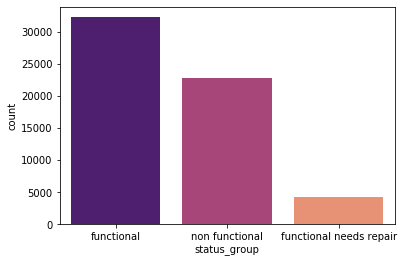

In [89]:
sns.countplot(df.status_group, palette = 'magma')
plt.show()

### Amount TSH vs Status Group

In [107]:
#df[df['status_group'] == 'non functional']['amount_tsh'].value_counts()

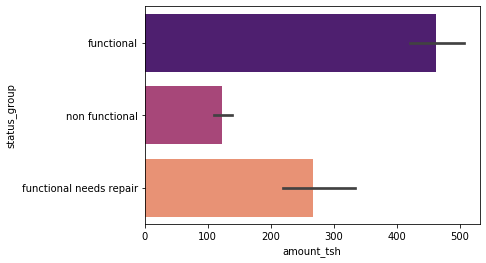

In [105]:
sns.barplot(x = 'amount_tsh', y = 'status_group', data = df, palette = 'magma')
plt.show()


In [149]:


sns.distplot(df[df.status_group == 'functional'].amount_tsh, hist = False, 
            label='functional', color = 'purple')
sns.distplot(df[df.status_group == 'non functional'].amount_tsh, hist = False, 
            label = 'not functional', color = 'magenta')
sns.distplot(np.log(df[df.status_group == 'functional needs repair'].amount_tsh, hist = False, 
            label = 'needs repair', color = 'orange')

plt.legend(bbox_to_anchor = [1, 1])
plt.show()

SyntaxError: invalid syntax (<ipython-input-149-650d55df859a>, line 8)

### GPS Height vs Status Group 

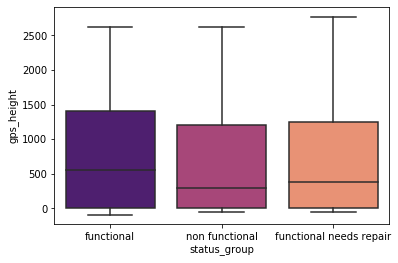

In [145]:
sns.boxplot(x = 'status_group', y = 'gps_height', data = df, palette = 'magma')
plt.show()
